# Class 5: Statistical variables, distributions, life history and conservation 
## EEB 125 

## Today's data story:
### Are mammals that take longer go grow up at greater risk of extinction?

## Read in maturation data

- How long does each species usually take to grow to maturity?
- Measured in days

In [1]:
file = open("maturity.csv")
lines = file.readlines()
header = lines[0]
data = lines[1:]
print(header)
print(data[1:4])

order,species,maturity_age_d

['Carnivora,Canis_adustus,249.88\n', 'Carnivora,Canis_aureus,371.23\n', 'Carnivora,Canis_latrans,372.9\n']


## Read in IUCN data

- Extinction risk across mammalian speciecs

In [2]:
# get our data read in and prepped

iucn=open("iucn_status.csv")
iucn_lines = iucn.readlines()
iucn_header = iucn_lines[0]
iucn_data = iucn_lines[1:]
iucn_header
iucn_data[1:4]


['Rodentia,Abeomelomys_sevia,LC\n',
 'Rodentia,Abrawayaomys_ruschii,LC\n',
 'Rodentia,Abrocoma_bennettii,LC\n']

## IUCN Red List

- To assess extinction risk, we will use IUCN status
- IUCN is a conservation organization that manages information on threats to wild animals
 - https://www.iucnredlist.org/

## IUCN Red List

![](images/iucn.png)

## Read in our IUCN data

In [3]:
# get our data read in and prepped

iucn=open("iucn_status.csv")
iucn_lines = iucn.readlines()
iucn_header = iucn_lines[0]
iucn_data = iucn_lines[1:]

## IUCN Red List

- We will need to combine information from both datasets to ask our question


In [4]:
print(iucn_header)
print(header)

order,species,iucn_status

order,species,maturity_age_d



##  Our approach:
 
- We will calculate the mean maturation time for all of the mammals within a given risk category
- Need to merge the two datasets by linking information for all the species shared between datasets

## Setup both datasets

- Map the IUCN threat level to each species using a dictionary

In [5]:
sp_iucn = {}
for line in iucn_data:
    line_dat = line.strip().split(",")
    species = line_dat[1]
    iucn_risk = line_dat[2]
    sp_iucn[species] = iucn_risk

## Setup both datasets

- Map maturation time to each species using a dictionary

In [6]:
sp_mat = {}
for line in data:
    line_dat = line.strip().split(",")
    species = line_dat[1]
    mat_time = line_dat[2]
    if mat_time != "NA":
        sp_mat[species] = float(mat_time) / 365 # convert to years

## Linking things up

- We will want to calculate the mean maturation time for the species within each risk category
- First, how can we find what unique risk categories exist in our dataset?

In [7]:
risk_cat = sp_iucn.values() 

In [8]:
unique_risk_cat = set(risk_cat)
print(unique_risk_cat)

{'EW', 'EX', 'LC', 'NT', 'EN', 'VU', 'CR', 'DD'}


## Getting setup

- create our container that links maturation times with IUCN risk level
- we will want to store the maturation times associated with each level in a list

In [9]:
iucn_mat = {}
for cat in unique_risk_cat:
    iucn_mat[cat] = []

## Link our two dictionaries to a third

- Both of our dictionaries, `sp_mat` and `sp_iucn` have species names as the keys
- We can use the keys of one to look up the values from the other
- We then need to add values to our third dictionary, `iucn_mat`

## Dictionary overload

- `sp_mat`: keys = species name, values = maturation time
- `sp_iucn`: keys = species name, values = iucn risk level
- `iucn_mat`: keys = iucn risk level, values = empty list (to be populated with maturation times)

## The approach (in English)

- iterate through `sp_mat`
  - keys are species, values are maturation time
- look up the IUCN risk level stored in `sp_iucn` using the keys we are iterating over
- populate the lists associated with each key in `iucn_mat`

In [10]:
"""for sp in sp_mat:
    mat = sp_mat[sp]
    iucn_cat = sp_iucn[sp]           ## 
    iucn_mat[iucn_cat].append(mat)"""


'for sp in sp_mat:\n    mat = sp_mat[sp]\n    iucn_cat = sp_iucn[sp]           ## \n    iucn_mat[iucn_cat].append(mat)'

In [11]:
for sp in sp_mat:
    mat = sp_mat[sp]
    try:
        iucn_cat = sp_iucn[sp]           ## 
        iucn_mat[iucn_cat].append(mat)
    except:
        continue

## Calculate means

- loop through iucn_mat and calculate the mean for each risk level

In [12]:
# let's calculate a function that does this
def mean(pop):
    tot = 0
    for i in pop:
        tot += i
    mean = tot / len(pop)
    return mean

In [13]:
iucn_means = {}

for cat in iucn_mat:
    mat_times = iucn_mat[cat]
    if len(mat_times)>0:
        cat_mean = mean(mat_times)
        iucn_means[cat] = cat_mean


In [14]:
for cat in iucn_means:
    print(cat, iucn_means[cat])

LC 1.3070467107359027
NT 1.9234479036944785
EN 3.4431253424657533
VU 2.461642942227516
CR 3.3271344178082196
DD 6.225632299927902


## What categories should we consider 'at risk'?

![](images/iucn_list.png)

## What categories should we consider 'at risk'?

- We will say anything above level 2 is "at risk", while anything below is not.


In [15]:
iucn_map={'LC':1,'NT':2,'VU':3,'EN':4,'CR':5,'EW':6,'EX':7,'DD':0}


## Mark species at risk, or not at risk

- We will say anything above level 2 is "at risk", while anything below is not.


In [16]:
sp_threat = {}
for line in iucn_data:
    line_dat = line.strip().split(",")
    species = line_dat[1]
    iucn_risk = line_dat[2]
    risk_numeric = iucn_map[iucn_risk]
    threat = False
    if risk_numeric > 2:
        threat = True
    elif risk_numeric == 0:
        continue
    sp_threat[species] = threat

##  Our approach:
 
- We will calculate the mean maturation time for all at risk, vs not at risk mammals

## Setup both datasets

- Map maturation time to each species using a dictionary

In [17]:
sp_mat = {}
for line in data:
    line_dat = line.strip().split(",")
    species = line_dat[1]
    mat_time = line_dat[2]
    if mat_time != "NA":
        sp_mat[species] = float(mat_time) / 365 # convert to years


## Link our two dictionaries to a third

- Both of our dictionaries, `sp_mat` and `sp_iucn` have species names as the keys
- We can use the keys of one to look up the values from the other
- We then need to add values to our third dictionary, `iucn_mat`

In [18]:
threat_mat={True:[],False:[]}

## Dictionary overload

- `sp_mat`: keys = species name, values = maturation time
- `sp_iucn`: keys = species name, values = iucn risk level
- `threat_mat`: keys = threat, values = empty list (to be populated with maturation times)

## The approach (in English)

- iterate through `sp_mat`
  - keys are species, values are maturation time
- look up the IUCN risk level stored in `sp_iucn` using the keys we are iterating over
- populate the lists associated with each key in `iucn_mat`

In [19]:
for sp in sp_mat:
    mat = sp_mat[sp]
    try:
        threat = sp_threat[sp]
        threat_mat[threat].append(mat)
    except:
        continue


In [20]:
# threat_mat

## Calculate means

- loop through iucn_mat and calculate the mean for threatened vs non-threatened species

In [21]:
threat_means = {}

for threat in threat_mat:
    mat_times = threat_mat[threat]    
    threat_mean = mean(mat_times)
    threat_means[threat] = threat_mean

print(threat_means)

{True: 2.982301369863013, False: 1.3610022528251142}


In [22]:
for threat in threat_means:
    print(threat,threat_means[threat])

True 2.982301369863013
False 1.3610022528251142



## Statistical Distributions

- What is a statistical distribution?

- How can a distribution be summarized?

- What questions can we answer using a distribution? 

## What is the distribution of conservation risk across mammals?

How many species belong to each category?

![](images/iucn_list.png)

In [23]:
keys = list(iucn_map.keys())
vals = [0]*len(iucn_map)    
iucn_counts = dict(zip(keys,vals))
iucn_counts

{'LC': 0, 'NT': 0, 'VU': 0, 'EN': 0, 'CR': 0, 'EW': 0, 'EX': 0, 'DD': 0}

## What is the distribution of conservation risk across mammals?

In [24]:
for line in iucn_data:
    line_dat = line.strip().split(",")
    iucn_risk = line_dat[2]
    iucn_counts[iucn_risk]+=1
    


## What is the distribution of conservation risk across mammals?

In [25]:
print(iucn_counts)

{'LC': 3157, 'NT': 350, 'VU': 525, 'EN': 464, 'CR': 204, 'EW': 2, 'EX': 82, 'DD': 1047}


## Importing modules

- There are often times where something we want to do is so common that someone has already written code that does it
- These are packeged in the form of python 'modules'
- We need to **import** these modules to use this code
- We will use one for plotting data called **matplotlib**
    - (you will not need to do this yourself yet-- just watch for now)

In [26]:
import matplotlib.pyplot as plt

## What is the distribution of conservation risk across mammals?

- The bars represent the frequency of observations and the labels on the horizontal axis represent the number of species at a conservation risk level. 

- This is called the **frequency distribution** of conservation risk.

## What is the distribution of conservation risk across mammals?

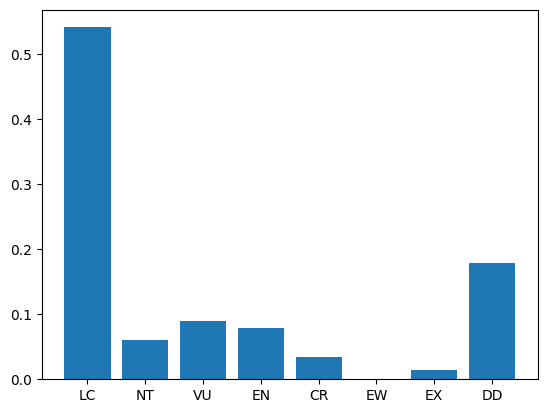

In [27]:
rel_counts = [i/sum(iucn_counts.values()) for i in iucn_counts.values()]
plt.bar(iucn_counts.keys(),rel_counts)
plt.show()

- If we want to plot proportions instead of counts then we can transform `activity_dist` by dividing by the total number of observations.

- This is called the *relative frequency distribution* of activity.

- **Q: About what proportion of mammals is at risk?**

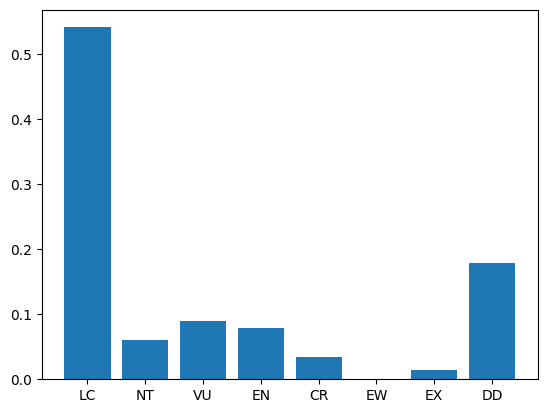

In [28]:
rel_counts = [i/sum(iucn_counts.values()) for i in iucn_counts.values()]
plt.bar(iucn_counts.keys(),rel_counts)
plt.show()

## Summarizing the distribution of a continuous variable

### What is the distribution of the time it takes to grow up across mammals?

## Variation

- One of the most important concepts in statistics and biology

- Standard deviation is average deviation from the mean 
  + **Large** values mean lots of variation and **small** values mean less variation.   

- Other measures of variation also exist (e.g., the range-- max - min)

## Variance

- How far from the mean are the data, on average?
- Calculate the difference between each data point and the mean
- Calculate the mean of these differences


In [29]:
def variance(data,mean_val):
    diffs=[]
    for i in data:
        diff = i - mean_val
        sq_diff = diff ** 2
        diffs.append(sq_diff)
    var = mean(diffs)
    return var

## Standard Deviation

- Square root of the variance
- Descibes the variation in values, expressed in the same units as the data

In [30]:
import math

def st_dev(data,mean_val):
    var = variance(data,mean_val)
    sd = math.sqrt(var)
    return sd

## Calculate means

- loop through iucn_mat and calculate the mean for each risk level

In [31]:
threat_sds = {}

for threat in threat_mat:
    mat_times = threat_mat[threat]  
    threat_mean = threat_means[threat]
    threat_sd = st_dev(mat_times,threat_mean)
    threat_sds[threat] = threat_sd
threat_sds

{True: 2.6542271371902126, False: 1.6706546418287143}

In [32]:
for threat in threat_means:
    threat_mean = threat_means[threat]
    threat_sd = threat_sds[threat]
    print(threat,threat_mean,threat_sd)

True 2.982301369863013 2.6542271371902126
False 1.3610022528251142 1.6706546418287143


## Histograms

- We can also visualize central tendency and variation using a type of plot called a **histogram**

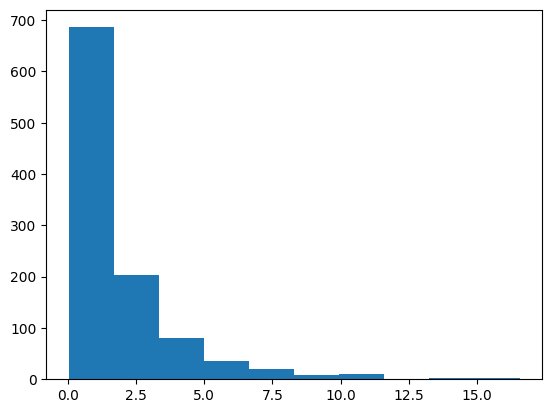

In [33]:
plt.hist(sp_mat.values())
plt.show()

## Histograms

- We can also visualize the *relative* frequency, or proportion of individuals with each maturation time

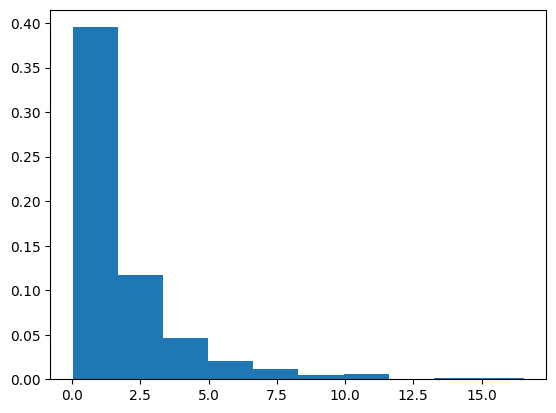

In [34]:
plt.hist(sp_mat.values(),density=True)
plt.show()

## Histograms

- Histograms can be useful to visualize differences in how data are distributed

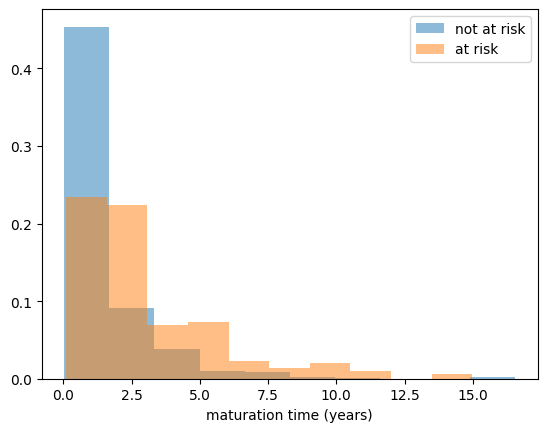

In [35]:
plt.hist(threat_mat[False],density=True,alpha=0.5,label="not at risk")
plt.hist(threat_mat[True],density=True,alpha=0.5,label="at risk")
plt.legend(loc='upper right')
plt.xlabel("maturation time (years)")
plt.show()

## Midterm

- Online
- Can be taken in any 2-hour window from 13:00 on Feb. 14th until 13:00 Feb. 15th



## Format

- Mix of:
  + (simple) programming exercises (i.e., produce your own code)
  + code reading/interpretation (i.e., explain some pre-written code)
  + data interpretation (i.e., look at some data summaries and interpret them)
- Will be largely similar to the structure of a homework assignment
